# <font color='cornflowerblue'>Natural Language Inference Approach UM - Data Team Club

In the second UM Data Team Club project, we'll be diving into Natural Language Inference (NLI). Our goal is to explore and analyze the relationships between different text pairs to understand whether one sentence logically follows from another.

## Contents Table
 - [Imports](#1)
 - [Load Data](#2)
 - [Data Exploring](#3)

### Imports <a id='lower'></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')


### Load Data <a id='2'></a>

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Train dataset size: {train.shape}")
print(f"Test dataset size: {test.shape}")

Train dataset size: (12120, 6)
Test dataset size: (5195, 5)


### Data Exploring <a id='3'></a>

In [9]:
train.head(3)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0


The NLI model will assign labels of 0, 1, or 2 (corresponding to entailment, neutral, and contradiction) to pairs of premises and hypotheses.

| <span style="color:cornflowerblue">Label</span> | <span style="color:cornflowerblue">Description</span>       |
|---------------------------------------|---------------------------------------------------|
| 0                                     | Entailment                                        |
| 1                                     | Neutral                                           |
| 2                                     | Contradiction                                     |


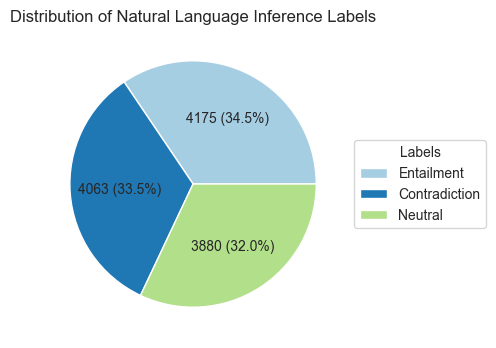

In [24]:
labels_map = {0: 'Entailment', 1: 'Neutral', 2: 'Contradiction'}
label_counts = train['label'].map(labels_map).value_counts()

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(label_counts,autopct=lambda pct: func(pct, label_counts),labels=[None]*len(label_counts),colors=plt.cm.Paired.colors)
plt.legend(wedges, label_counts.index, title="Labels", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Natural Language Inference Labels")
display()


In [11]:
train['language'].value_counts()

language
English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: count, dtype: int64

In [12]:
train2 = train.copy()

def word_count(text):
    return len(text.split())

def char_count(text):
    return len(text)

train2['premise_word_count'] = train2['premise'].apply(word_count)
train2['premise_char_count'] = train2['premise'].apply(char_count)
train2['hypothesis_word_count'] = train2['hypothesis'].apply(word_count)
train2['hypothesis_char_count'] = train2['hypothesis'].apply(char_count)

def describe_column(column):
    stats = {
        'mean': int(column.mean()),
        'max': int(column.max()),
        'min': int(column.min())
    }
    return stats

premise_word_stats = describe_column(train2['premise_word_count'])
premise_char_stats = describe_column(train2['premise_char_count'])
hypothesis_word_stats = describe_column(train2['hypothesis_word_count'])
hypothesis_char_stats = describe_column(train2['hypothesis_char_count'])

stats = {
    'Premise Words': premise_word_stats,
    'Hypothesis Words': hypothesis_word_stats,
    'Premise Characters': premise_char_stats,
    'Hypothesis Characters': hypothesis_char_stats}

stats = pd.DataFrame(stats).T
stats

,mean,max,min
Premise Words,17,196,1
Hypothesis Words,9,46,1
Premise Characters,107,967,4
Hypothesis Characters,53,276,4
